In [2]:
# 도수분포표, 파레토 그래프를 그리는 과제 HW1

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import platform

# OS 판별
system_name = platform.system()

# 한글 폰트 설정
if system_name == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif system_name == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    # Linux 등 기타 OS는 여기서 지정
    plt.rcParams['font.family'] = 'NanumGothic'  # 설치되어 있어야 함

# 음수 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 표본 데이터, 근데 혹시 파이썬에서 import할수 있는 데이터인가요? 일일이 16페이지 보고 쳤습니다 ㅠㅠ)
can_data = np.array([
    101.8, 101.5, 102.6, 101, 101.8, 96.8, 102.4, 100,
    98.8, 98.1, 98.8, 98, 99.4, 95.5, 100.1, 100.5, 97.4, 100.2,
    101.4, 98.7, 101.4, 99.4, 101.7, 99, 99.7, 98.8, 99.5, 100,
    99.7, 100.9, 99.7, 99, 98.8, 99.7, 100.9, 99.9, 97.5,
    101.5, 98.2, 99.2, 98.6, 101.4, 102.1, 102.9, 100.8,
    99.4, 103.7, 100.3, 100.2, 101.1, 101.8, 100, 101.2,
    100.5, 101.2, 101.6, 99.9, 100.5, 100.4, 98.1, 100.1,
    101.6, 99.3, 96.1, 100, 99.7, 99.7, 99.4, 101.5, 100.9,
    101.2, 99.9, 99.1, 100.7, 100.8, 100.8, 101.4, 100.3, 98.4, 97.2
])

print(len(can_data))

80


In [5]:
bins = 5 # 계급 구간 개수 

can_data = np.sort(can_data) # 오름차순으로 정렬

min_data = can_data[0] # 최솟값
max_data = can_data[-1] # 최댓값

print(min_data, max_data)

95.5 103.7


In [6]:
L1 = min_data - 0.5
Uk = max_data + 0.5 


deter = round((Uk - L1) / bins, 2) # 계급 구간의 간격, 소수점 2자리까지만 표시
print(deter)

1.84


In [7]:
bins_list = [round(L1 + i * deter, 2) for i in range(bins + 1)] # 계급 경계 생성 
print(bins_list)
 


[np.float64(95.0), np.float64(96.84), np.float64(98.68), np.float64(100.52), np.float64(102.36), np.float64(104.2)]


In [8]:
freq, bin_edges = np.histogram(can_data, bins=bins_list) # 빈도, 계급 경계

intervals = [f"{round(bin_edges[i],2)} ~ {round(bin_edges[i+1],2)}" for i in range(len(bin_edges)-1)] # 계급 구간 head 생성
print(intervals)

['95.0 ~ 96.84', '96.84 ~ 98.68', '98.68 ~ 100.52', '100.52 ~ 102.36', '102.36 ~ 104.2']


In [9]:
# 상대도수 계산
rel_freq = np.round(freq / np.sum(freq), 4)

print(rel_freq)

[0.0375 0.1125 0.475  0.325  0.05  ]


In [10]:
# 도수분포표 생성
df = pd.DataFrame({
    '계급': [i for i in range(len(freq))],
    '계급구간': intervals,
    '도수': freq,
    '상대도수': rel_freq
})

# 합계 행 추가
total_row = pd.DataFrame({
    '계급' : ['Total'],
    '계급구간': [f'{L1}  ~  {Uk}'],
    '도수': [df['도수'].sum()],
    '상대도수': [round(df['상대도수'].sum(), 4)]  
}, index=None)


df = pd.concat([df, total_row])

df

,계급,계급구간,도수,상대도수
0,0,95.0 ~ 96.84,3,0.0375
1,1,96.84 ~ 98.68,9,0.1125
2,2,98.68 ~ 100.52,38,0.4750
3,3,100.52 ~ 102.36,26,0.3250
4,4,102.36 ~ 104.2,4,0.0500
0,Total,95.0 ~ 104.2,80,1.0000


In [11]:
df_plot = df.iloc[:-1]


df_plot = df_plot.sort_values(by='도수', ascending=False)


df_plot['누적상대도수'] = df_plot['상대도수'].cumsum()



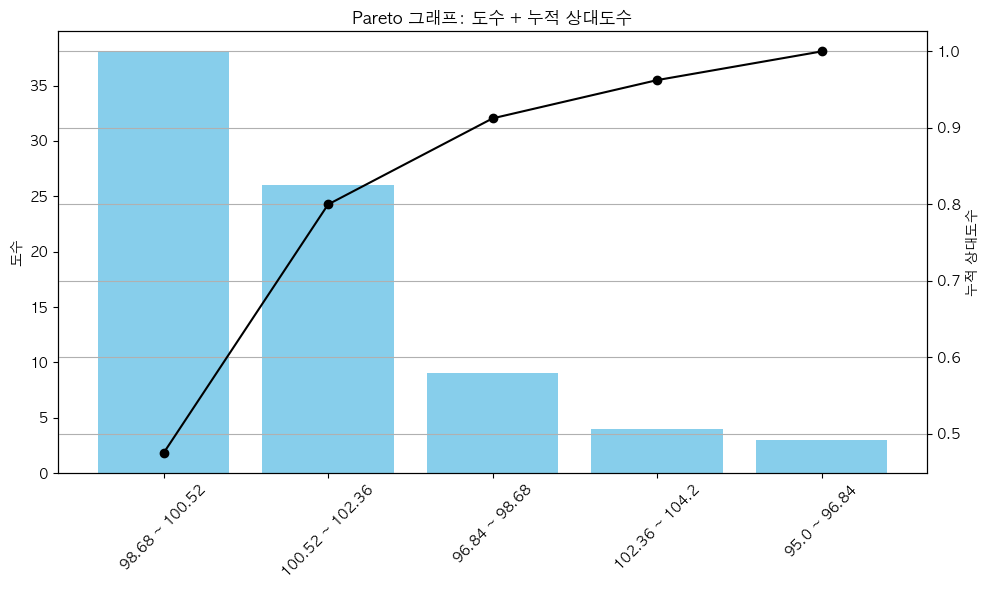

In [12]:
# x축: 계급구간
x = range(len(df_plot))
labels = df_plot['계급구간']

fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대그래프: 도수
ax1.bar(x, df_plot['도수'], color='skyblue')
ax1.set_ylabel('도수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45)

# 선그래프: 누적 상대도수
ax2 = ax1.twinx()
ax2.plot(x, df_plot['누적상대도수'], color='black', marker='o')
ax2.set_ylabel('누적 상대도수', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Pareto 그래프: 도수 + 누적 상대도수')
plt.grid(True)
plt.tight_layout()
plt.show()